In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Copper_Set.csv',dtype='unicode')
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.15113862,30156308,28,Won,W,10,2,1500,DEQ1 S460MC,1670798778,20210701,854
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.0248392,30202938,25,Won,W,41,0.8,1210,0000000000000000000000000000000000104991,1668701718,20210401,1047
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.1279489,30153963,30,Won,WI,28,0.38,952,S0380700,628377,20210101,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.4110654,30349574,32,Won,S,59,2.3,1317,DX51D+ZM310MAO 2.3X1317,1668701718,20210101,768
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.5262616,30211560,28,Won,W,10,4,2000,2_S275JR+AR-CL1,640665,20210301,577


In [3]:
df.shape        

(181673, 14)

In [4]:
df = df.drop(df.query('item_date == "19950000" | item_date== "20191919"').index)

In [5]:
df = df.drop(df.query('item_date=="20210401"').index)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181012 entries, 660 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             181011 non-null  object
 1   item_date      181011 non-null  object
 2   quantity tons  181012 non-null  object
 3   customer       181011 non-null  object
 4   country        180984 non-null  object
 5   status         181010 non-null  object
 6   item type      181012 non-null  object
 7   application    180988 non-null  object
 8   thickness      181011 non-null  object
 9   width          181012 non-null  object
 10  material_ref   103545 non-null  object
 11  product_ref    181012 non-null  object
 12  delivery date  181011 non-null  object
 13  selling_price  181011 non-null  object
dtypes: object(14)
memory usage: 20.7+ MB


In [7]:
df.isna().sum()

id                   1
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77467
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df.describe()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
count,181011,181011,181012,181011,180984,181010,181012,180988,181011,181012,103545,181012,181011,181011
unique,181011,249,181012,1168,17,8,7,30,673,1387,16533,33,27,9771
top,C935F95A-F469-4533-BBB7-0DB1356581B6,20201202,85.26786769,30157111,78,Won,W,10,2,1250,DX51D+Z,611993,20210101,832
freq,1,2779,1,4988,31865,115507,105222,77224,12944,39026,922,45582,33026,399


In [9]:
df = df.drop(df.query('`delivery date` == "20212222"').index)
df = df.drop(df.query('(status !="Won") and (status !="Lost")').index)

In [10]:
df.query('(status != "Won") and (status !="Lost")')

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price


In [11]:
#df = df.drop(labels=['material_ref'],axis=1)
df.shape

(149866, 14)

In [12]:
df['item_date']=pd.to_datetime(df['item_date'], format='mixed').dt.date
df['delivery date']=pd.to_datetime(df['delivery date'],format='mixed').dt.date

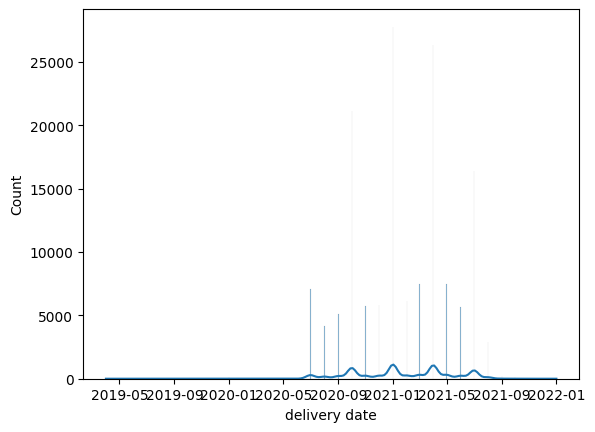

In [13]:
fig, ax = plt.subplots(1,1)
sb.histplot(data=df,x='delivery date',binwidth=10,kde=True,bins=20, label="Skewness: %.2f"%(df["selling_price"].skew()))
plt.figure(fig)
plt.show()

In [14]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
660,C935F95A-F469-4533-BBB7-0DB1356581B6,2021-03-31,85.26786769,30199280,26,Won,W,42,0.9,1378,0000000000000000000000000000000004019006,611993,2021-07-01,1054
661,E55B1D55-C6B4-4EB3-BE87-79D9BEFCF743,2021-03-31,47.5684912,30267349,84,Won,W,10,0.7,1500,NaN,1668701718,2021-04-01,1183.31
662,B73F459A-4A41-4483-B942-EBA86A33CDF5,2021-03-31,27.59159168,30329989,32,Won,Others,42,0.88,1045,188100079CMUS3ATL,164141591,2021-07-01,1060
663,D8BF7099-7B4A-4BB2-8B7C-5DC07F8111B4,2021-03-31,100.7131104,30166502,27,Won,W,59,0.8,1058,S350GDHDRAL1028 0.8X1058,611993,2021-07-01,1382.4
664,B47D48E1-0FEC-401B-9D96-5235D6E0533D,2021-03-31,16.83525156,30199280,26,Won,W,42,0.4,1004,0000000000000000000000000000000003076167,611993,2021-07-01,1291


In [15]:
df.shape

(149866, 14)

In [37]:
#df[df.material_ref.str.startswith("00000")]
#df = df.drop(df['material_ref'].isna().index)
df.shape

(149866, 14)

In [16]:
df.rename(columns={'quantity tons':'quantity_tons','item type':'item_type','delivery date':'delivery_date'})

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
660,C935F95A-F469-4533-BBB7-0DB1356581B6,2021-03-31,85.26786769,30199280,26,Won,W,42,0.9,1378,0000000000000000000000000000000004019006,611993,2021-07-01,1054
661,E55B1D55-C6B4-4EB3-BE87-79D9BEFCF743,2021-03-31,47.5684912,30267349,84,Won,W,10,0.7,1500,NaN,1668701718,2021-04-01,1183.31
662,B73F459A-4A41-4483-B942-EBA86A33CDF5,2021-03-31,27.59159168,30329989,32,Won,Others,42,0.88,1045,188100079CMUS3ATL,164141591,2021-07-01,1060
663,D8BF7099-7B4A-4BB2-8B7C-5DC07F8111B4,2021-03-31,100.7131104,30166502,27,Won,W,59,0.8,1058,S350GDHDRAL1028 0.8X1058,611993,2021-07-01,1382.4
664,B47D48E1-0FEC-401B-9D96-5235D6E0533D,2021-03-31,16.83525156,30199280,26,Won,W,42,0.4,1004,0000000000000000000000000000000003076167,611993,2021-07-01,1291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.4824216,30200854,25,Won,W,41,0.96,1220,0000000000000000000000000000000001000777,164141591,2020-07-01,591
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.0864686,30200854,25,Won,W,41,0.95,1500,0000000000000000000000000000000001000227,164141591,2020-07-01,589
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235593568,30200854,25,Won,W,41,0.71,1250,0000000000000000000000000000000001004216,164141591,2020-07-01,619
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000,30200854,25,Won,W,41,0.85,1250,0000000000000000000000000000000001001149,164141591,2020-07-01,601


In [17]:
df['selling_price'] = df['selling_price'].astype(float)

In [18]:
#encoding the data
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['status'])
df['new_status'] = encoded

In [19]:
encoded = encoder.fit_transform(df['item type'])
df['item_type'] = encoded

<Axes: xlabel='new_status'>

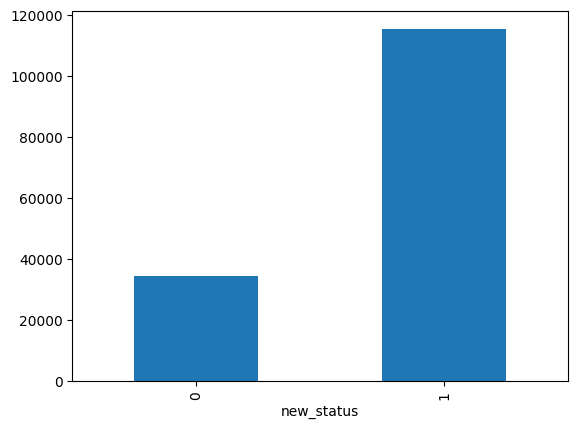

In [20]:
df.groupby(['new_status']).size().plot(kind='bar')

<Axes: xlabel='item_type'>

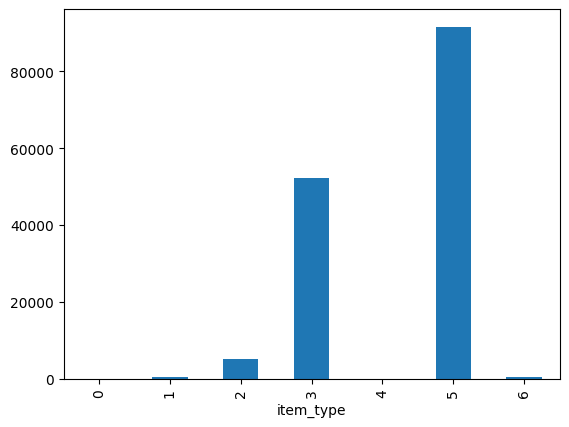

In [126]:
df.groupby(['item_type']).size().plot(kind='bar')

<Axes: xlabel='product_ref'>

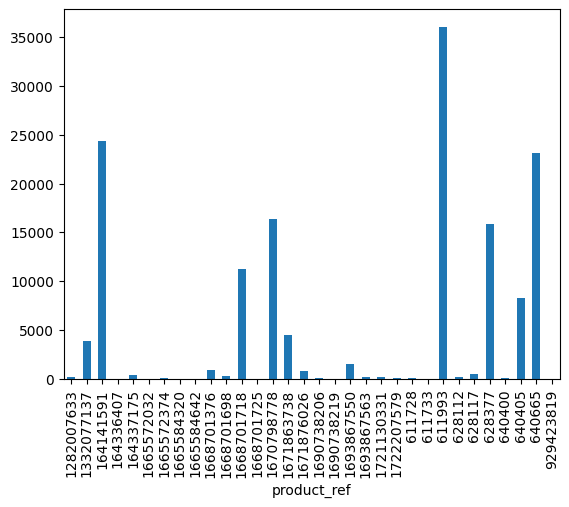

In [21]:
df.groupby(['product_ref']).size().plot(kind='bar')

<Axes: xlabel='country'>

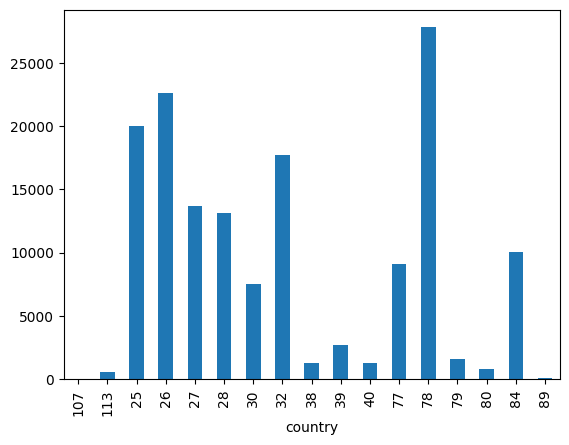

In [22]:
df.groupby(['country']).size().plot(kind='bar')

In [24]:
cmode = df['country'].mode()
cmode

0    78
Name: country, dtype: object

In [25]:
## Removing the non numeric columns
df = df.drop(['id'],axis=1)
df = df.drop(['delivery date'],axis=1)
df = df.drop(['item_date'],axis=1)
df = df.drop(['status'],axis=1)
df = df.drop(['item type'],axis=1)
df = df.drop(['material_ref'],axis=1)

In [26]:
df.shape

(149866, 10)

In [27]:
df.isna().sum()

quantity tons    0
customer         1
country          4
application      3
thickness        0
width            0
product_ref      0
selling_price    1
new_status       0
item_type        0
dtype: int64

In [28]:
df['selling_price'] = df['selling_price'].astype(float)

In [29]:
price_mean = df['selling_price'].mean()
df['selling_price'] = df['selling_price'].fillna(price_mean)

In [30]:
#droping the nan values
#df = df.dropna(subset=['customer','country','application'])

In [31]:
df['customer'].isna().index

Index([   660,    661,    662,    663,    664,    665,    666,    667,    668,
          669,
       ...
       181663, 181664, 181665, 181666, 181667, 181668, 181669, 181670, 181671,
       181672],
      dtype='int64', length=149861)

In [32]:
## Data type conversions

In [33]:
#df['country'] = df['country'].astype(int)


In [34]:
#df['delivery date'].astype(str)

#df['quantity tons'] = df['quantity tons'].astype(float)

mode = df['country'].mode()

In [35]:
mode

0    78
Name: country, dtype: object

In [36]:
df['country'] = df['country'].fillna(mode)

In [38]:
df.head()
df1 = df

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149861 entries, 660 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  149861 non-null  object 
 1   customer       149861 non-null  object 
 2   country        149861 non-null  object 
 3   application    149861 non-null  object 
 4   thickness      149861 non-null  object 
 5   width          149861 non-null  object 
 6   product_ref    149861 non-null  object 
 7   selling_price  149861 non-null  float64
 8   new_status     149861 non-null  int32  
 9   item_type      149861 non-null  int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 11.4+ MB


In [40]:
df1['customer'] = df1['customer'].astype('category')
df1['country'] = df1['country'].astype('category')
df1['application'] = df1['application'].astype('category')
df1['thickness'] = df1['thickness'].astype('category')
df1['width'] = df1['width'].astype('category')
df1['quantity tons'] = df1['quantity tons'].astype('category')
df1['product_ref'] = df1['product_ref'].astype('category')

In [41]:
df1.head()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,new_status,item_type
660,85.26786769,30199280,26,42,0.9,1378,611993,1054.00,1,5
661,47.5684912,30267349,84,10,0.7,1500,1668701718,1183.31,1,5
662,27.59159168,30329989,32,42,0.88,1045,164141591,1060.00,1,1
663,100.7131104,30166502,27,59,0.8,1058,611993,1382.40,1,5
664,16.83525156,30199280,26,42,0.4,1004,611993,1291.00,1,5


In [42]:
df1['quantity tons'] = df1['quantity tons'].astype(float)

df1['customer'] = df1['customer'].astype(float)
df1['country'] = df1['country'].astype(float)
df1['application'] = df1['application'].astype(float)
df1['thickness'] = df1['thickness'].astype(float)
df1['width'] = df1['width'].astype(float)
df1['quantity tons'] = df1['quantity tons'].astype(float)
df1['product_ref'] = df1['product_ref'].astype(float)

ValueError: Cannot cast object dtype to float64

<Axes: >

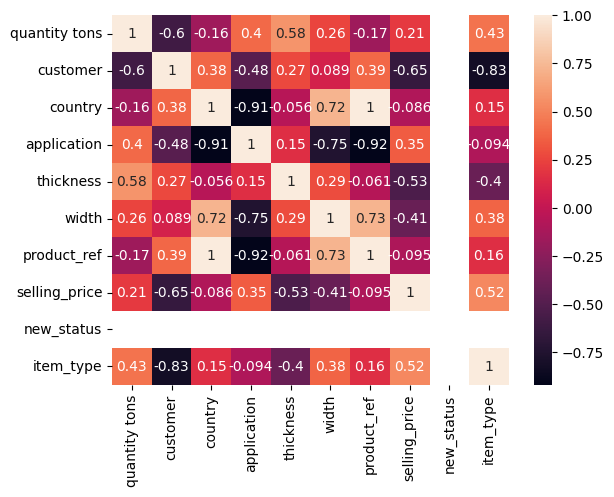

In [180]:
corr = df1.select_dtypes('number').corr()
sb.heatmap(corr,annot=True)

<Axes: xlabel='selling_price', ylabel='Count'>

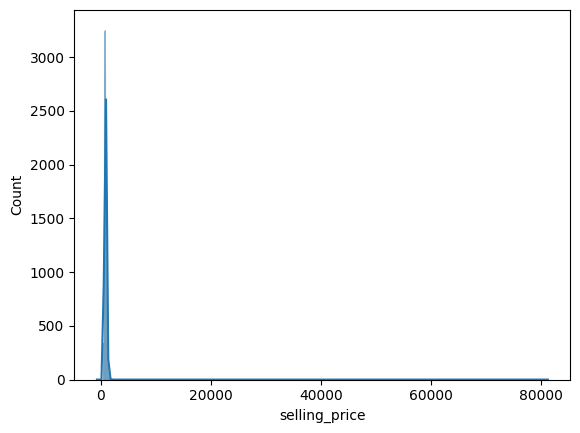

In [43]:
sb.histplot(df1,x='selling_price',kde=True)

<Axes: xlabel='thickness', ylabel='Count'>

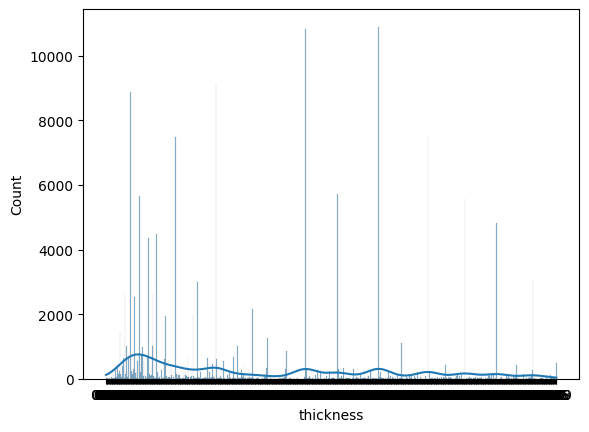

In [44]:
sb.histplot(df1,x='thickness',kde=True)

<Axes: xlabel='application', ylabel='Count'>

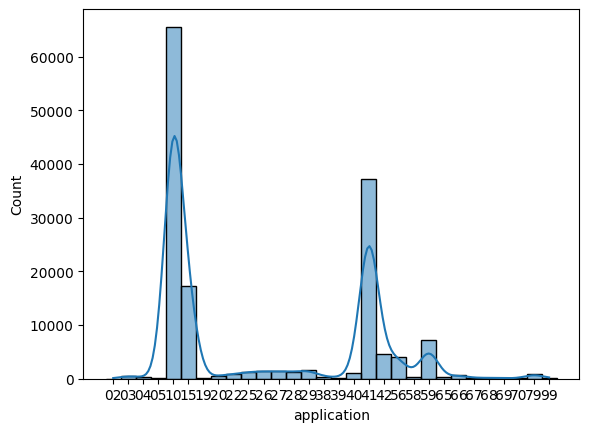

In [45]:
sb.histplot(df1,x='application',kde=True)

<Axes: xlabel='customer', ylabel='Count'>

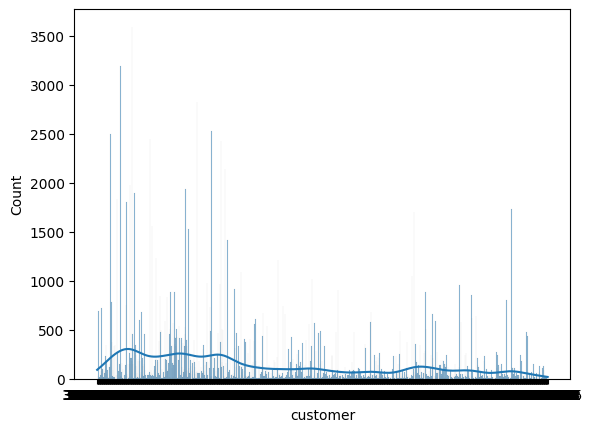

In [46]:
sb.histplot(df1,x='customer',kde=True)

In [47]:
df1.skew(axis=0)

TypeError: 'Categorical' with dtype category does not support reduction 'skew'

In [ ]:
sb.boxplot(y=df['selling_price'])

In [ ]:
import numpy as np

In [ ]:
Q1 = df1['selling_price'].quantile(0.25)
Q3 = df1['selling_price'].quantile(0.75)
IQR = Q3 - Q1
IQR
threshold=1.5

In [ ]:
Q3,IQR,Q1


In [ ]:
ll=Q1-threshold * IQR
ll

In [ ]:
ul=

In [ ]:
outliers = df1[(df1['selling_price'] < Q1 - threshold * IQR) | (df1['selling_price'] > Q3 + threshold * IQR)]
df1 = df1.drop(outliers.index)

In [ ]:
sb.boxplot(y=df['selling_price'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149861 entries, 660 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   quantity tons  149861 non-null  category
 1   customer       149861 non-null  category
 2   country        149861 non-null  category
 3   application    149861 non-null  category
 4   thickness      149861 non-null  category
 5   width          149861 non-null  category
 6   product_ref    149861 non-null  category
 7   selling_price  149861 non-null  float64 
 8   new_status     149861 non-null  int32   
 9   item_type      149861 non-null  int32   
dtypes: category(7), float64(1), int32(2)
memory usage: 10.6 MB


In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [51]:
X = array[:,0:8]
Y = array[:,8]

NameError: name 'array' is not defined

In [50]:
X

NameError: name 'X' is not defined

In [67]:
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,new_status,item_type
660,C935F95A-F469-4533-BBB7-0DB1356581B6,2021-03-31,85.26786769,30199280,26,Won,W,42,0.9,1378,0000000000000000000000000000000004019006,611993,2021-07-01,1054.00,1,5
661,E55B1D55-C6B4-4EB3-BE87-79D9BEFCF743,2021-03-31,47.5684912,30267349,84,Won,W,10,0.7,1500,NaN,1668701718,2021-04-01,1183.31,1,5
662,B73F459A-4A41-4483-B942-EBA86A33CDF5,2021-03-31,27.59159168,30329989,32,Won,Others,42,0.88,1045,188100079CMUS3ATL,164141591,2021-07-01,1060.00,1,1
663,D8BF7099-7B4A-4BB2-8B7C-5DC07F8111B4,2021-03-31,100.7131104,30166502,27,Won,W,59,0.8,1058,S350GDHDRAL1028 0.8X1058,611993,2021-07-01,1382.40,1,5
664,B47D48E1-0FEC-401B-9D96-5235D6E0533D,2021-03-31,16.83525156,30199280,26,Won,W,42,0.4,1004,0000000000000000000000000000000003076167,611993,2021-07-01,1291.00,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.4824216,30200854,25,Won,W,41,0.96,1220,0000000000000000000000000000000001000777,164141591,2020-07-01,591.00,1,5
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.0864686,30200854,25,Won,W,41,0.95,1500,0000000000000000000000000000000001000227,164141591,2020-07-01,589.00,1,5
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235593568,30200854,25,Won,W,41,0.71,1250,0000000000000000000000000000000001004216,164141591,2020-07-01,619.00,1,5
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000,30200854,25,Won,W,41,0.85,1250,0000000000000000000000000000000001001149,164141591,2020-07-01,601.00,1,5
